<a href="https://colab.research.google.com/github/nadaz10/multiclass-/blob/main/Lab3_CSE459_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.losses import SparseCategoricalCrossentropy,CategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy,CategoricalAccuracy
from tensorflow.keras.optimizers import SGD


In [ ]:
!pip install mnist
import mnist

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [ ]:
# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [ ]:
train_images.shape

(60000, 28, 28, 1)

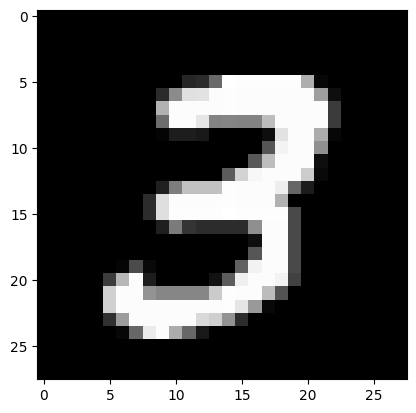

In [ ]:
plt.imshow(train_images[7][:,:,0],cmap='gray')#,cmap='grayscale' google greyscale in matplot
plt.show()

In [ ]:
train_labels[7]

3

In [ ]:
learning_rate = 0.001
n_epochs = 6
initializer = RandomNormal(mean=0., stddev=1.)

In [ ]:
model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(64, activation='relu', kernel_initializer=initializer),
  Dense(32, activation='relu', kernel_initializer=initializer),
  Dense(32, activation='relu', kernel_initializer=initializer),
  Dense(10, activation='softmax',kernel_initializer=initializer)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 53706 (209.79 KB)
Trainable params: 53706 (209.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
model.compile(
    optimizer='adam',
    loss= CategoricalCrossentropy(),#
    metrics=[CategoricalAccuracy()],
)

history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs=n_epochs,
    validation_data=(test_images, to_categorical(test_labels)),
)

Epoch 1/6
1875/1875 [==============================] - 7s 3ms/step - loss: 65.4623 - categorical_accuracy: 0.3158 - val_loss: 2.8834 - val_categorical_accuracy: 0.1827
Epoch 2/6
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3614 - categorical_accuracy: 0.1673 - val_loss: 2.2903 - val_categorical_accuracy: 0.1726
Epoch 3/6
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1680 - categorical_accuracy: 0.2057 - val_loss: 2.1151 - val_categorical_accuracy: 0.2412
Epoch 4/6
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0169 - categorical_accuracy: 0.2594 - val_loss: 1.9582 - val_categorical_accuracy: 0.2936
Epoch 5/6
1875/1875 [==============================] - 9s 5ms/step - loss: 1.8556 - categorical_accuracy: 0.3121 - val_loss: 1.7514 - val_categorical_accuracy: 0.3378
Epoch 6/6
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6701 - categorical_accuracy: 0.3714 - val_loss: 1.7573 - val_categorical_accuracy: 0.38

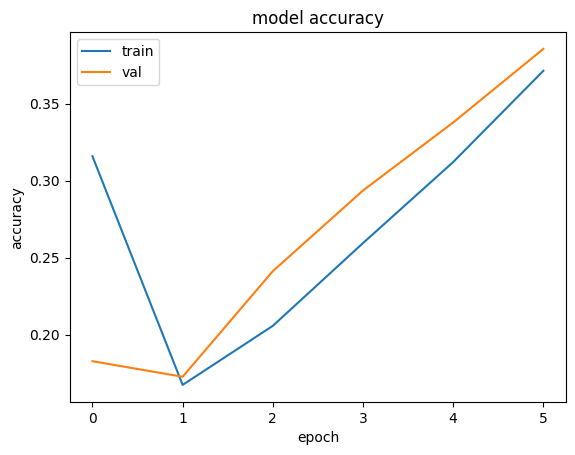

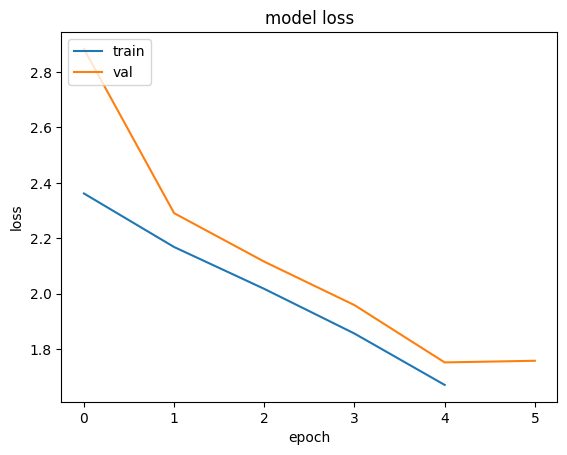

In [ ]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(history.history['loss'][1:])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(test_images[:5])
print(predictions.shape)
print(predictions)


# Print our model's predictions.
print("Predictions")
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

print("Data")
# Check our predictions
print(test_labels[:5]) # [7, 2, 1, 0, 4]


1/1 [==============================] - 0s 157ms/step
(5, 10)
[[3.26187536e-02 1.76366270e-01 7.11434484e-02 1.71283141e-01
  2.20976435e-02 1.39760584e-01 1.59812402e-02 1.57648847e-01
  1.55641153e-01 5.74589260e-02]
 [7.66914291e-03 2.20320653e-02 4.21492249e-01 9.93092358e-03
  3.86883534e-04 2.03990377e-02 4.98280734e-01 4.56214875e-05
  1.97633579e-02 3.58687080e-10]
 [3.26187536e-02 1.76366270e-01 7.11434484e-02 1.71283141e-01
  2.20976435e-02 1.39760584e-01 1.59812402e-02 1.57648847e-01
  1.55641153e-01 5.74589260e-02]
 [1.00000000e+00 0.00000000e+00 2.08147925e-21 1.11359618e-13
  3.16889647e-26 8.15458898e-12 1.97736725e-08 0.00000000e+00
  7.14425518e-30 1.52289228e-17]
 [0.00000000e+00 4.48068294e-29 8.59055948e-03 1.05766505e-02
  8.48087132e-01 4.61899303e-03 4.08324470e-13 2.94371657e-02
  5.46922674e-03 9.32201743e-02]]
Predictions
[1 6 1 0 4]
Data
[7 2 1 0 4]
